# 探究项目与国家奖牌获取之间的关系

C:\Users\ROG\AppData\Local\Temp\ipykernel_25808\2063480178.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hhi_by_year = df.groupby('Year').apply(calculate_hhi).reset_index(name='HHI')
C:\Users\ROG\AppData\Local\Temp\ipykernel_25808\2063480178.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept_P_Value': model.pvalues[0],
C:\Users\ROG\AppData\Local\Temp\ipykernel_25808\2063480178.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys 

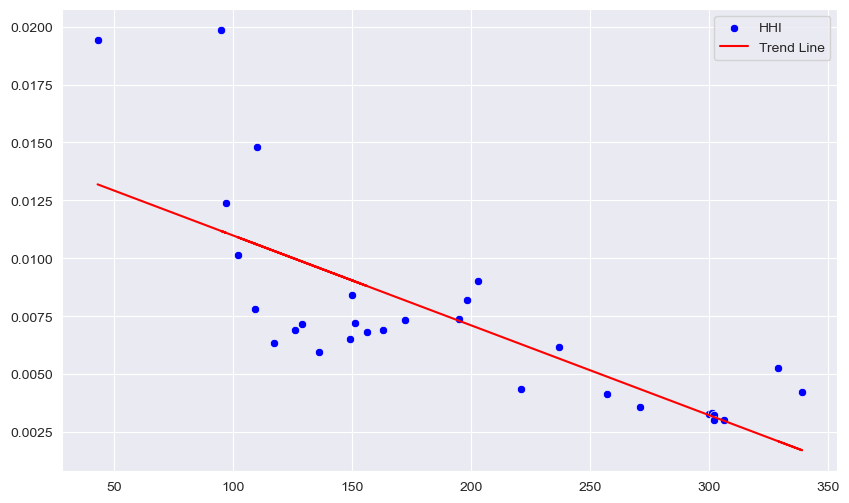

                            OLS Regression Results                            
Dep. Variable:                    HHI   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     36.72
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.56e-06
Time:                        17:21:26   Log-Likelihood:                 134.02
No. Observations:                  30   AIC:                            -264.0
Df Residuals:                      28   BIC:                            -261.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0149    

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 读取数据
file_path = 'merged_output_cleaned.csv'
df = pd.read_csv(file_path)

# 计算每届奥运会的HHI
def calculate_hhi(group):
    total_medals = group['Total_Medals'].sum()
    if total_medals == 0:
        return np.nan
    share = group['Total_Medals'] / total_medals
    hhi = (share ** 2).sum()
    return hhi

# 按年份分组计算HHI
hhi_by_year = df.groupby('Year').apply(calculate_hhi).reset_index(name='HHI')

# 合并项目数量数据
hhi_by_year = hhi_by_year.merge(df[['Year', 'Total_Sports_Events']].drop_duplicates(), on='Year')

# 回归分析
X = sm.add_constant(hhi_by_year['Total_Sports_Events'])
y = hhi_by_year['HHI']
model = sm.OLS(y, X).fit()

# 添加趋势线数据到DataFrame
hhi_by_year['Trend_Line'] = model.predict(X)

# 保存绘图数据到CSV
hhi_by_year.to_csv('hhi_trend_data.csv', index=False)

# 提取回归统计结果
regression_stats = {
    'Intercept': model.params['const'],
    'Slope': model.params['Total_Sports_Events'],
    'R_Squared': model.rsquared,
    'Intercept_P_Value': model.pvalues[0],
    'Slope_P_Value': model.pvalues[1],
    'Intercept_Std_Error': model.bse[0],
    'Slope_Std_Error': model.bse[1]
}

regression_stats_df = pd.DataFrame([regression_stats])

# 保存统计结果到CSV
regression_stats_df.to_csv('regression_results.csv', index=False)

# 可视化并保存图片
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Sports_Events', y='HHI', data=hhi_by_year, color='blue', label='HHI')
plt.plot(hhi_by_year['Total_Sports_Events'], hhi_by_year['Trend_Line'], color='red', label='Trend Line')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid(True)

# 保存图片
plt.savefig('hhi_trend_plot.png', dpi=300, bbox_inches='tight')  # 保存为PNG文件，分辨率300dpi
plt.show()  # 显示图片

# 输出模型摘要和趋势方程
print(model.summary())
print(f"\nTrend Line Equation: HHI = {regression_stats['Slope']:.4f} * Total_Sports_Events + {regression_stats['Intercept']:.4f}")
print(f"R-squared: {regression_stats['R_Squared']:.4f}")

# 1. 回归结果解读
1.1 模型整体拟合情况
R-squared (R²): 0.567

表示模型解释了因变量（HHI）56.7% 的变异。

说明 Total_Sports_Events（总项目数量）对 HHI 的变化有一定的解释力，但仍有部分变异未被模型解释。

Adj. R-squared: 0.552

调整后的 R²，考虑了自变量数量，略低于 R²，但仍然表明模型拟合较好。

F-statistic: 36.72，Prob (F-statistic): 1.56e-06

F 检验的 p 值远小于 0.05，说明模型整体显著，自变量对因变量有显著影响。

1.2 回归系数
const (截距): 0.0149

当 Total_Sports_Events 为 0 时，HHI 的预测值为 0.0149。

由于 Total_Sports_Events 不可能为 0，截距的实际意义较小。

Total_Sports_Events: -3.876e-05

回归系数为负，表示 Total_Sports_Events 每增加 1 个单位，HHI 平均减少 0.00003876。

p 值: 0.000，远小于 0.05，说明 Total_Sports_Events 对 HHI 有显著的负向影响。

1.3 置信区间
const: [0.012, 0.018]

截距的 95% 置信区间为 0.012 到 0.018。

Total_Sports_Events: [-5.19e-05, -2.57e-05]

Total_Sports_Events 的回归系数的 95% 置信区间为 -0.0000519 到 -0.0000257。

区间不包含 0，进一步支持了 Total_Sports_Events 对 HHI 的显著负向影响。

1.4 模型诊断
Omnibus: 11.979，Prob(Omnibus): 0.003

Omnibus 检验的 p 值小于 0.05，说明残差可能不符合正态分布。

Jarque-Bera (JB): 11.190，Prob(JB): 0.00372

JB 检验的 p 值小于 0.05，进一步确认残差不符合正态分布。

Durbin-Watson: 0.723

接近 2 表示残差无自相关性，但 0.723 表明可能存在正自相关性。

Skew: 1.243

残差分布右偏。

Kurtosis: 4.666

残差分布具有尖峰厚尾特征。

# 2. 趋势线方程
Trend Line Equation: HHI = -0.0000 * Total_Sports_Events + 0.0149

表示随着 Total_Sports_Events 的增加，HHI 呈下降趋势。

斜率的绝对值非常小（-0.0000），说明 Total_Sports_Events 对 HHI 的影响较弱，但统计上显著。

# 3. 实际意义
3.1 HHI 的变化
HHI 是衡量奖牌集中度的指标，值越高表示奖牌越集中在少数国家，值越低表示奖牌分布越均匀。

回归结果表明，随着奥运会项目数量的增加，奖牌分布趋于分散（HHI 下降）。

这可能是因为项目数量增加为更多国家提供了获奖机会，减少了奖牌集中在少数国家的现象。

3.2 政策或实践意义
如果国际奥委会希望增加奖牌分布的公平性，可以考虑进一步增加项目数量。

但需要注意的是，HHI 的变化幅度较小（斜率的绝对值很小），因此项目数量增加对奖牌分布的影响可能有限。

# 4. 模型改进建议
非线性关系：

如果 HHI 与 Total_Sports_Events 的关系是非线性的，可以尝试多项式回归或其他非线性模型。

其他自变量：

引入其他可能影响 HHI 的变量（如参赛国家数量、经济发展水平等），以提高模型的解释力。

数据分布问题：

如果残差不符合正态分布，可以尝试对因变量（HHI）进行变换（如对数变换）或使用稳健回归方法。

# 5. 总结
主要结论：

Total_Sports_Events 对 HHI 有显著的负向影响，表明项目数量增加会使奖牌分布更加分散。

模型的 R² 为 0.567，说明 Total_Sports_Events 解释了 HHI 变化的 56.7%。

局限性：

残差不符合正态分布，可能影响模型的可靠性。

斜率的绝对值较小，实际影响可能有限。

如果有进一步的分析需求或问题，请随时告诉我！

Mann-Whitney U test: Statistic=38058.5, p-value=9.969734737988197e-05
United States和China在综合优势项目上的奖牌数有显著差异。


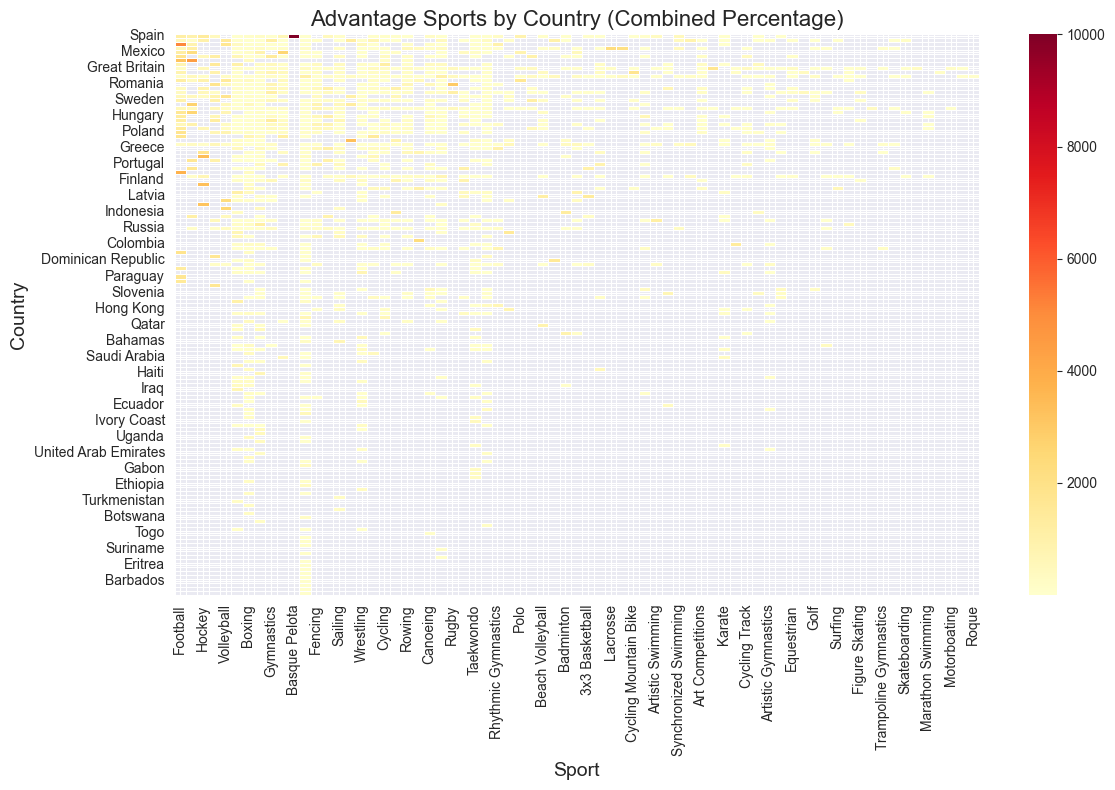

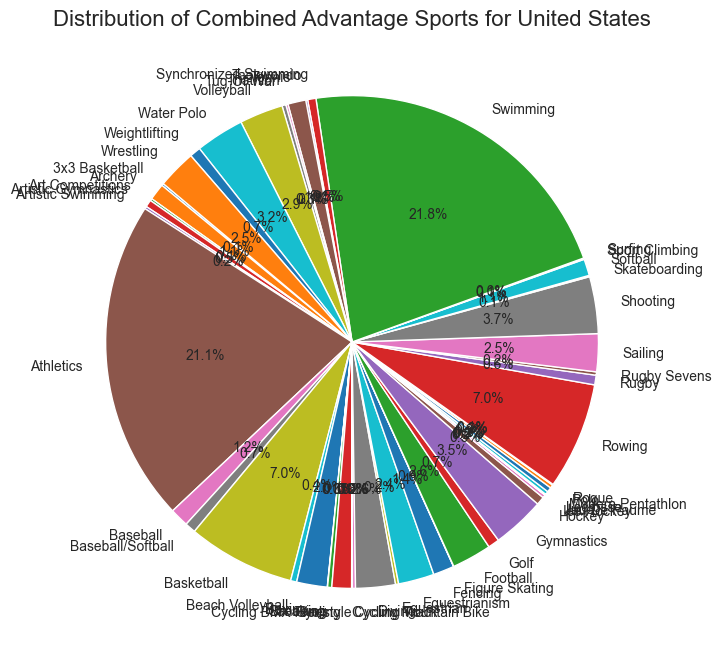

           NOC      Sport  Combined_Percentage
0  Afghanistan  Taekwondo             3.125000
1  Afghanistan  Taekwondo             3.125000
2      Albania  Wrestling             2.777778
3      Algeria     Boxing             4.545455
4      Algeria       Judo             3.278689
                Sport     Medals
58           Swimming  15.249864
19            Cricket  12.727922
10  Baseball/Softball  11.842719
34         Gymnastics  10.408621
7           Athletics   9.624738
..                ...        ...
1         Aeronautics        NaN
12      Basque Pelota        NaN
20            Croquet        NaN
46           Racquets        NaN
48              Roque        NaN

[71 rows x 2 columns]


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.stats import mannwhitneyu

# 假设数据存储在CSV文件中
data = pd.read_csv(r'.\data\country_sports_event_medals.csv')

# 处理缺失值
data.fillna(0, inplace=True)

# 确保数据类型正确
data['Gold'] = data['Gold'].astype(int)
data['Medals'] = data['Medals'].astype(int)

# 计算每个项目/国家的总奖牌数
data['Total_Medals_Per_Sport'] = data.groupby(['Sport', 'Year'])['Medals'].transform('sum')
data['Total_Medals_Per_NOC'] = data.groupby(['NOC', 'Year'])['Medals'].transform('sum')

# 计算奖牌占比
data['Medal_Percentage_Sport'] = (data['Medals'] / data['Total_Medals_Per_Sport']) * 100
data['Medal_Percentage_NOC'] = (data['Medals'] / data['Total_Medals_Per_NOC']) * 100

# 将两种比例相乘
data['Combined_Percentage'] = data['Medal_Percentage_Sport'] * data['Medal_Percentage_NOC']

# 筛选出综合优势项目
advantage_combined = data[data['Combined_Percentage'] > (2 * 2)]  # 20% * 20% = 4%

# 按国家分组，列出综合优势项目
advantage_combined_by_country = advantage_combined.groupby('NOC')['Sport'].unique().reset_index()

# 统计每个国家的综合优势项目数量
advantage_combined_by_country['Number_of_Advantage_Sports'] = advantage_combined_by_country['Sport'].apply(len)

# Mann-Whitney U检验（比较美国和中国的奖牌数）
country1 = 'United States'
country2 = 'China'
usa_medals = advantage_combined[advantage_combined['NOC'] == country1]['Medals']
chn_medals = advantage_combined[advantage_combined['NOC'] == country2]['Medals']
stat, p = mannwhitneyu(usa_medals, chn_medals)
print(f'Mann-Whitney U test: Statistic={stat}, p-value={p}')
if p < 0.05:
    print(f'{country1}和{country2}在综合优势项目上的奖牌数有显著差异。')
else:
    print(f'{country1}和{country2}在综合优势项目上的奖牌数没有显著差异。')

# 创建透视表：国家 vs 项目，值为综合比例
heatmap_data = advantage_combined.pivot_table(index='NOC', columns='Sport', values='Combined_Percentage', aggfunc='mean')

# 对数据进行排序
heatmap_data['Total'] = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.sort_values(by='Total', ascending=False).drop(columns='Total')
heatmap_data = heatmap_data[heatmap_data.sum().sort_values(ascending=False).index]

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='.1f', linewidths=0.5)
plt.title('Advantage Sports by Country (Combined Percentage)', fontsize=16)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

# 1. 保留单一国家强势运动的饼状图
country = 'United States'
country_data = advantage_combined[advantage_combined['NOC'] == country]
sport_medals = country_data.groupby('Sport')['Medals'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sport_medals['Medals'], labels=sport_medals['Sport'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Combined Advantage Sports for {country}', fontsize=16)
plt.show()

# 2. 遍历所有国家，挑选出前三的强势项目并导出到CSV文件
top_advantage_sports = []

# 遍历每个国家
for noc in advantage_combined['NOC'].unique():
    country_data = advantage_combined[advantage_combined['NOC'] == noc]
    # 按综合比例从高到低排序
    country_data_sorted = country_data.sort_values(by='Combined_Percentage', ascending=False)
    # 选择前三个项目
    top_sports = country_data_sorted.head(3)
    for _, row in top_sports.iterrows():
        top_advantage_sports.append({
            'NOC': noc,
            'Sport': row['Sport'],
            'Combined_Percentage': row['Combined_Percentage'] / 100  # 转换为百分比
        })

# 转换为DataFrame
top_advantage_sports_df = pd.DataFrame(top_advantage_sports)

# 导出到CSV文件
top_advantage_sports_df.to_csv('top_advantage_sports_by_country.csv', index=False)

# 检查结果
print(top_advantage_sports_df.head())

# 计算每个项目的奖牌分布标准差
sport_medals_std = advantage_combined.groupby('Sport')['Medals'].std().reset_index()

# 按标准差从高到低排序
sport_medals_std_sorted = sport_medals_std.sort_values(by='Medals', ascending=False)

# 输出结果
print(sport_medals_std_sorted)


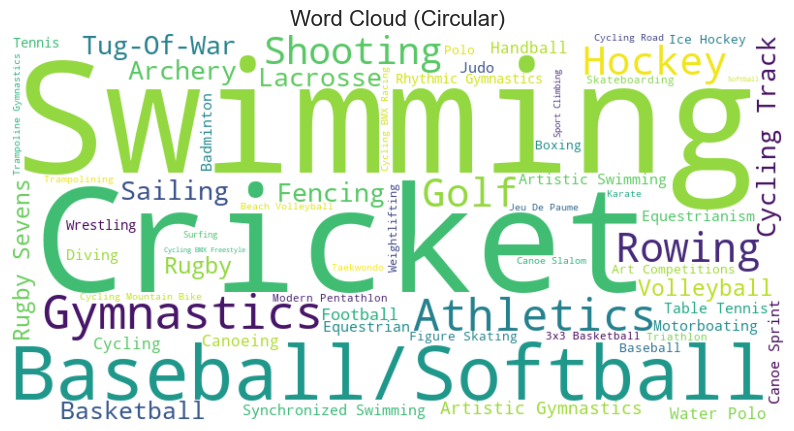

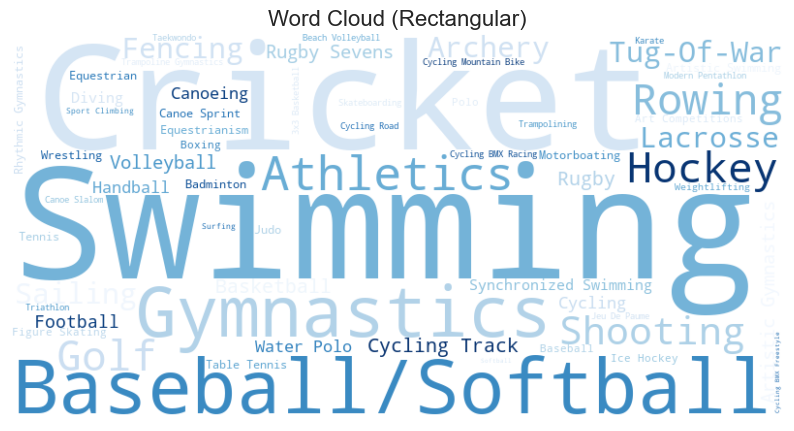

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Desktop\\ModelingCompetition\\Modeling\\circle_mask.png'

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.stats import mannwhitneyu
import numpy as np
from PIL import Image

# 假设数据存储在CSV文件中
data = pd.read_csv(r'.\data\country_sports_event_medals.csv')

# 处理缺失值
data.fillna(0, inplace=True)

# 确保数据类型正确
data['Gold'] = data['Gold'].astype(int)
data['Medals'] = data['Medals'].astype(int)

# 计算每个项目的奖牌分布标准差（离散程度）
sport_medals_std = data.groupby('Sport')['Medals'].std().reset_index()

# 按标准差从高到低排序并去除NaN
sport_medals_std_sorted = sport_medals_std.sort_values(by='Medals', ascending=False).dropna()

# 创建输出文件夹
output_folder = './wordcloud_output'
os.makedirs(output_folder, exist_ok=True)

# 词云图1：默认形式（圆形）
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(sport_medals_std_sorted['Sport'], sport_medals_std_sorted['Medals'])))
wordcloud1_path = os.path.join(output_folder, 'wordcloud1.png')
wordcloud1.to_file(wordcloud1_path)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Circular)', fontsize=16)
plt.show()

# 词云图2：矩形词云
wordcloud2 = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(dict(zip(sport_medals_std_sorted['Sport'], sport_medals_std_sorted['Medals'])))
wordcloud2_path = os.path.join(output_folder, 'wordcloud2.png')
wordcloud2.to_file(wordcloud2_path)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Rectangular)', fontsize=16)
plt.show()

# 词云图3：自定义形状词云
# 使用一个圆形mask来生成词云图
mask = np.array(Image.open('./circle_mask.png'))  # 请确保你有一个圆形mask图像
wordcloud3 = WordCloud(width=800, height=400, mask=mask, background_color='white', contour_width=1, contour_color='black').generate_from_frequencies(dict(zip(sport_medals_std_sorted['Sport'], sport_medals_std_sorted['Medals'])))
wordcloud3_path = os.path.join(output_folder, 'wordcloud3.png')
wordcloud3.to_file(wordcloud3_path)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Custom Shape)', fontsize=16)
plt.show()

# 打印输出保存路径
print(f"Word clouds have been saved to: {output_folder}")


In [71]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import os

# 加载数据
data_path = r'.\data\Processed_host_countries_medals.csv'
data = pd.read_csv(data_path)

# 获取所有国家列表
countries = data['NOC'].unique()

def process_country(country, data, main_output_dir):
    country_output_dir = os.path.join(main_output_dir, f'output_{country}')
    os.makedirs(country_output_dir, exist_ok=True)

    country_data = data[data['NOC'] == country]
    host_years = country_data[country_data['isHost'] == 1]
    non_host_years = country_data[country_data['isHost'] == 0]

    sports = [col for col in country_data.columns if '_Gold' in col]
    results = []

    for sport in sports:
        sport_name = sport.replace('_Gold', '')
        medals_col = sport.replace('_Gold', '_Medals')

        host_event = host_years[sport].dropna()
        host_medals = host_years[medals_col].dropna()
        non_host_event = non_host_years[sport].dropna()
        non_host_medals = non_host_years[medals_col].dropna()

        # 检查数据是否恒定
        def is_constant(series):
            return series.nunique() <= 1

        host_constant = is_constant(host_event) or is_constant(host_medals)
        non_host_constant = is_constant(non_host_event) or is_constant(non_host_medals)

        # 调试输出
        print(f'\n国家: {country}, 项目: {sport_name}')
        print(f'东道主数据点: {len(host_event)}, 恒定: {host_constant}')
        print(f'非东道主数据点: {len(non_host_event)}, 恒定: {non_host_constant}')

        # 计算相关系数
        def calculate_corr(x, y):
            if len(x) > 1 and len(y) > 1 and not is_constant(x) and not is_constant(y):
                return stats.spearmanr(x, y)
            return (None, None)

        host_corr, host_p = calculate_corr(host_event, host_medals)
        non_host_corr, non_host_p = calculate_corr(non_host_event, non_host_medals)

        results.append({
            'Sport': sport_name,
            'Host_Correlation': host_corr,
            'Host_p-value': host_p,
            'NonHost_Correlation': non_host_corr,
            'NonHost_p-value': non_host_p
        })

    # 保存结果（无论是否为空）
    results_df = pd.DataFrame(results).dropna(how='all')
    output_path = os.path.join(country_output_dir, f'{country}_correlations.csv')
    results_df.to_csv(output_path, index=False)
    print(f'\n✅ 国家 {country} 保存完成，有效行数: {len(results_df)}')

# 主输出目录
main_output_dir = 'output_all_countries'
os.makedirs(main_output_dir, exist_ok=True)

# 遍历所有国家
for country in countries:
    print(f'\n===== 处理国家: {country} =====')
    process_country(country, data, main_output_dir)

print('\n处理完成！')


===== 处理国家: Australia =====

国家: Australia, 项目: 3x3 Basketball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Alpinism
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Archery
东道主数据点: 2, 恒定: False
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Art Competitions
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Artistic Gymnastics
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Artistic Swimming
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Athletics
东道主数据点: 2, 恒定: False
非东道主数据点: 26, 恒定: False

国家: Australia, 项目: Badminton
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Baseball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Baseball/Softball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Basketball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Basque Pelota
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Beach Volleyball
东道主数据点: 2, 恒定: False
非东道主数据点

In [72]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import os

# 加载数据
data_path = r'.\data\Processed_host_countries_medals.csv'
data = pd.read_csv(data_path)

# 获取所有国家列表
countries = data['NOC'].unique()

def process_country(country, data, main_output_dir):
    country_output_dir = os.path.join(main_output_dir, f'output_{country}')
    os.makedirs(country_output_dir, exist_ok=True)

    country_data = data[data['NOC'] == country]
    host_years = country_data[country_data['isHost'] == 1]
    non_host_years = country_data[country_data['isHost'] == 0]

    sports = [col for col in country_data.columns if '_Gold' in col]
    results = []

    for sport in sports:
        sport_name = sport.replace('_Gold', '')
        medals_col = sport.replace('_Gold', '_Medals')

        host_event = host_years[sport].dropna()
        host_medals = host_years[medals_col].dropna()
        non_host_event = non_host_years[sport].dropna()
        non_host_medals = non_host_years[medals_col].dropna()

        # 检查数据是否恒定（仅用于调试输出）
        def is_constant(series):
            return series.nunique() <= 1

        host_constant = is_constant(host_event) or is_constant(host_medals)
        non_host_constant = is_constant(non_host_event) or is_constant(non_host_medals)

        # 调试输出
        print(f'\n国家: {country}, 项目: {sport_name}')
        print(f'东道主数据点: {len(host_event)}, 恒定: {host_constant}')
        print(f'非东道主数据点: {len(non_host_event)}, 恒定: {non_host_constant}')

        # 计算相关系数（修改后的核心逻辑）
        def calculate_corr(x, y):
            if len(x) >= 2 and len(y) >= 2:  # 关键修改：仅检查数据点数量
                return stats.spearmanr(x, y)
            return (None, None)

        host_corr, host_p = calculate_corr(host_event, host_medals)
        non_host_corr, non_host_p = calculate_corr(non_host_event, non_host_medals)

        results.append({
            'Sport': sport_name,
            'Host_Correlation': host_corr,
            'Host_p-value': host_p,
            'NonHost_Correlation': non_host_corr,
            'NonHost_p-value': non_host_p
        })

    # 保存结果（包含可能存在的NaN值）
    results_df = pd.DataFrame(results).dropna(how='all')
    output_path = os.path.join(country_output_dir, f'{country}_correlations.csv')
    results_df.to_csv(output_path, index=False)
    print(f'\n✅ 国家 {country} 保存完成，有效行数: {len(results_df)}')

# 主输出目录
main_output_dir = 'output_all_countries'
os.makedirs(main_output_dir, exist_ok=True)

# 遍历所有国家
for country in countries:
    print(f'\n===== 处理国家: {country} =====')
    process_country(country, data, main_output_dir)

print('\n处理完成！')


===== 处理国家: Australia =====

国家: Australia, 项目: 3x3 Basketball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Alpinism
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Archery
东道主数据点: 2, 恒定: False
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Art Competitions
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Artistic Gymnastics
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Artistic Swimming
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Athletics
东道主数据点: 2, 恒定: False
非东道主数据点: 26, 恒定: False

国家: Australia, 项目: Badminton
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Baseball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Baseball/Softball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Basketball
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Basque Pelota
东道主数据点: 2, 恒定: True
非东道主数据点: 26, 恒定: True

国家: Australia, 项目: Beach Volleyball
东道主数据点: 2, 恒定: False
非东道主数据点

C:\Users\ROG\AppData\Local\Temp\ipykernel_11184\2405463481.py:48: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return stats.spearmanr(x, y)



国家: China, 项目: Triathlon
东道主数据点: 1, 恒定: True
非东道主数据点: 10, 恒定: True

国家: China, 项目: Tug-Of-War
东道主数据点: 1, 恒定: True
非东道主数据点: 10, 恒定: True

国家: China, 项目: Volleyball
东道主数据点: 1, 恒定: True
非东道主数据点: 10, 恒定: False

国家: China, 项目: Water Polo
东道主数据点: 1, 恒定: True
非东道主数据点: 10, 恒定: True

国家: China, 项目: Weightlifting
东道主数据点: 1, 恒定: True
非东道主数据点: 10, 恒定: False

国家: China, 项目: Wrestling
东道主数据点: 1, 恒定: True
非东道主数据点: 10, 恒定: False

✅ 国家 China 保存完成，有效行数: 69

===== 处理国家: Finland =====

国家: Finland, 项目: 3x3 Basketball
东道主数据点: 1, 恒定: True
非东道主数据点: 25, 恒定: True

国家: Finland, 项目: Alpinism
东道主数据点: 1, 恒定: True
非东道主数据点: 25, 恒定: True

国家: Finland, 项目: Archery
东道主数据点: 1, 恒定: True
非东道主数据点: 25, 恒定: False

国家: Finland, 项目: Art Competitions
东道主数据点: 1, 恒定: True
非东道主数据点: 25, 恒定: False

国家: Finland, 项目: Artistic Gymnastics
东道主数据点: 1, 恒定: True
非东道主数据点: 25, 恒定: True

国家: Finland, 项目: Artistic Swimming
东道主数据点: 1, 恒定: True
非东道主数据点: 25, 恒定: True

国家: Finland, 项目: Athletics
东道主数据点: 1, 恒定: True
非东道主数据点: 25, 恒定: False

国家: Finl